# 🧪 Parcial – Métodos Predictivos
Completa las celdas con `TODO` y ejecuta `Runtime → Run all` antes de entregar.

## 🎯 Instrucciones Generales
- Este parcial está dividido en dos partes: teoría (40 pts) y práctica (60 pts).
- Documenta claramente tu código y explica tus respuestas en celdas Markdown.
- Al finalizar, exporta el notebook a PDF y entrega también tus 5 slides con visualizaciones clave.


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* <!-- TODO -->


Definición:
Es la variable dependiente que buscamos predecir o explicar mediante el modelo de machine learning.
Ejemplo:
En un conjunto de datos de préstamos bancarios, la variable objetivo podría ser loan_status, que indica si el préstamo fue pagado o incumplido.

#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:* <!-- TODO -->


El flujo típico de un proyecto de machine learning es:

Análisis Exploratorio de Datos (EDA)

Preprocesamiento

Modelado

Evaluación

Extracción de insights de negocio

#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* <!-- TODO -->


Recomiendo usar el F1-Score, especialmente cuando la clase minoritaria es crítica.
¿Por qué?
Porque combina precisión y recall, evitando que métricas como la accuracy den una falsa sensación de buen desempeño al ignorar la clase minoritaria. Alternativas útiles incluyen AUC-ROC, matriz de confusión o precisión balanceada.

#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:* <!-- TODO -->


Descripción:
Sucede cuando el modelo aprende demasiado los detalles y el ruido del conjunto de entrenamiento, perdiendo capacidad para generalizar a datos nuevos.
Cómo detectarlo:

Gran diferencia entre rendimiento en entrenamiento y validación (por ejemplo, 98% vs 70% accuracy).

Curvas de aprendizaje que muestran divergencia clara entre error en entrenamiento y validación.
Técnicas para evitarlo:
Validación cruzada, dropout (en redes neuronales) o pruning (en árboles de decisión).

#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* <!-- TODO -->


K-means es un algoritmo de clustering no supervisado que no necesita etiquetas previas y busca agrupar datos basándose en su similitud intrínseca.



#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* <!-- TODO -->


La variable objetivo en problemas de regresión es cuantitativa y continua, como el precio de una casa o la temperatura. No es cualitativa ni binaria, ya que eso corresponde a clasificación.

#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:* <!-- TODO -->


Dos técnicas comunes son:

Tokenización: dividir el texto en unidades básicas, como palabras o subpalabras.

Vectorización: transformar esos tokens en números, usando métodos como TF-IDF o Bag-of-Words.
Otras técnicas incluyen lematización, eliminación de stopwords y el uso de embeddings.



#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* <!-- TODO -->


El parámetro k indica el número de clusters (grupos) que el algoritmo debe formar.
Si k es demasiado grande:

Se generan clusters poco relevantes (sobreajuste).

Cada grupo contiene muy pocos puntos, perdiendo significado.

Incrementa el costo computacional sin beneficios claros en interpretación.

#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* <!-- TODO -->


Son representaciones vectoriales densas que capturan el significado semántico de palabras o frases en un espacio numérico.
Utilidad:

Permiten realizar operaciones matemáticas con conceptos (por ejemplo, rey - hombre + mujer ≈ reina).

Son la entrada para modelos como RNNs o Transformers.

Reducen la dimensionalidad en comparación con métodos como Bag-of-Words.

In [1]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip

--2025-06-04 21:32:16--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip [following]
--2025-06-04 21:32:16--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043633 (1.9M) [application/zip]
Saving to: ‘amazon.csv.zip’

amazon.csv.zip      100%[===================>]   1.95M  --.-KB/s    in 0.07s   

In [2]:
!unzip amazon.csv.zip

Archive:  amazon.csv.zip
  inflating: amazon.csv              


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga de datos

In [4]:
# Reemplaza con la ruta correcta de tu archivo CSV si lo subes a Colab
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### 3. Limpieza y Feature Engineering


*   Tome `review_content` para crear una columna text

*   Haga una limpieza de rating:
```
df['col'] = df['col'].str.replace(',', '.').str.strip()
df['col'] = df['col'].str.replace('|', '0').str.strip()
df['col'] = df['col'].astype(float)
```
*   Haga una limpieza de `discounted_price`


```
  df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
  df['col'] = df['col'].replace('₹', '', regex=True).astype(float)
```



*   Haga una limpieza de `actual_price`

```
df['col'] = df['col'].str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['col'] = df['col'].replace('₹', '', regex=True)
df['col'] = df['col'].astype(float)
```


*   Cree la variable `positive` donde `ranting` se mayor a 4:
```
df['col1'] = df['col2'].apply(lambda x: 1 if x >= 4 else 0)
```

*   Con `discount_percentage` donde `ranting` se mayor a 4:
```
df['col'] = df['col'].replace('%', '', regex=True).astype(float)
```

In [13]:
# prompt: Tome review_content para crear una columna text

df['text'] = df['review_content']

In [16]:
# prompt: Haga una limpieza de rating

# Convert the 'rating' column to string type before applying string methods
df['rating'] = df['rating'].astype(str).str.replace(',', '.').str.strip()
df['rating'] = df['rating'].str.replace('|', '0').str.strip()
df['rating'] = df['rating'].astype(float)

In [17]:
# prompt: Haga una limpieza de discounted_price

df['discounted_price'] = df['discounted_price'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['discounted_price'] = df['discounted_price'].replace('₹', '', regex=True).astype(float)

In [18]:
# prompt: Haga una limpieza de actual_price

df['actual_price'] = df['actual_price'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
df['actual_price'] = df['actual_price'].replace('₹', '', regex=True)
df['actual_price'] = df['actual_price'].astype(float)

df['positive'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

df['discount_percentage'] = df['discount_percentage'].astype(str).replace('%', '', regex=True).astype(float)

In [19]:
# prompt: Cree la variable positive donde ranting se mayor a 4

df['positive'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)

In [23]:
df_high_rating = df[df['rating'] > 4].copy()

print(df_high_rating['discount_percentage'])

df['discount_percentage_high_rating'] = df.apply(lambda row: row['discount_percentage'] if row['rating'] > 4 else np.nan, axis=1)

df_high_rating = df[df['rating'] > 4].copy()

print(df_high_rating['discount_percentage'])

df['discount_percentage_high_rating'] = df.apply(lambda row: row['discount_percentage'] if row['rating'] > 4 else np.nan, axis=1)

0       64.0
3       53.0
4       61.0
6       65.0
7       23.0
        ... 
1452    57.0
1455    30.0
1457     0.0
1461    25.0
1464    22.0
Name: discount_percentage, Length: 929, dtype: float64
0       64.0
3       53.0
4       61.0
6       65.0
7       23.0
        ... 
1452    57.0
1455    30.0
1457     0.0
1461    25.0
1464    22.0
Name: discount_percentage, Length: 929, dtype: float64


In [24]:
from wordcloud import WordCloud

In [25]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 💻 Parte B – Práctica (60 pts)
### 1. Setup


## Realize dos WorldClouds uno con reviews positivos y otro con negativos y haga un grafico de barras comaparado por los 10 mas comunes.

In [26]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    return palabras

In [27]:
def contar_palabras(texto):
    palabras = limpiar_texto(texto)
    return Counter(palabras)

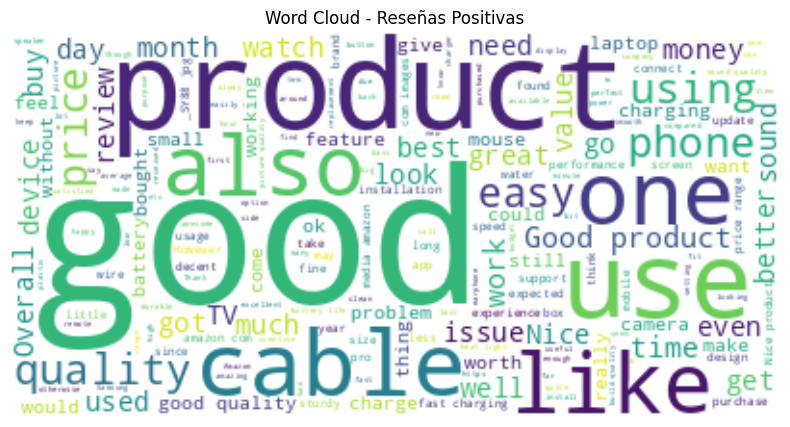

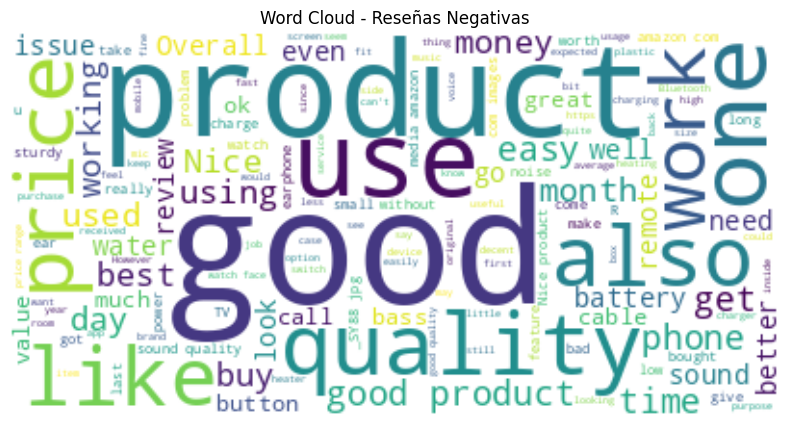

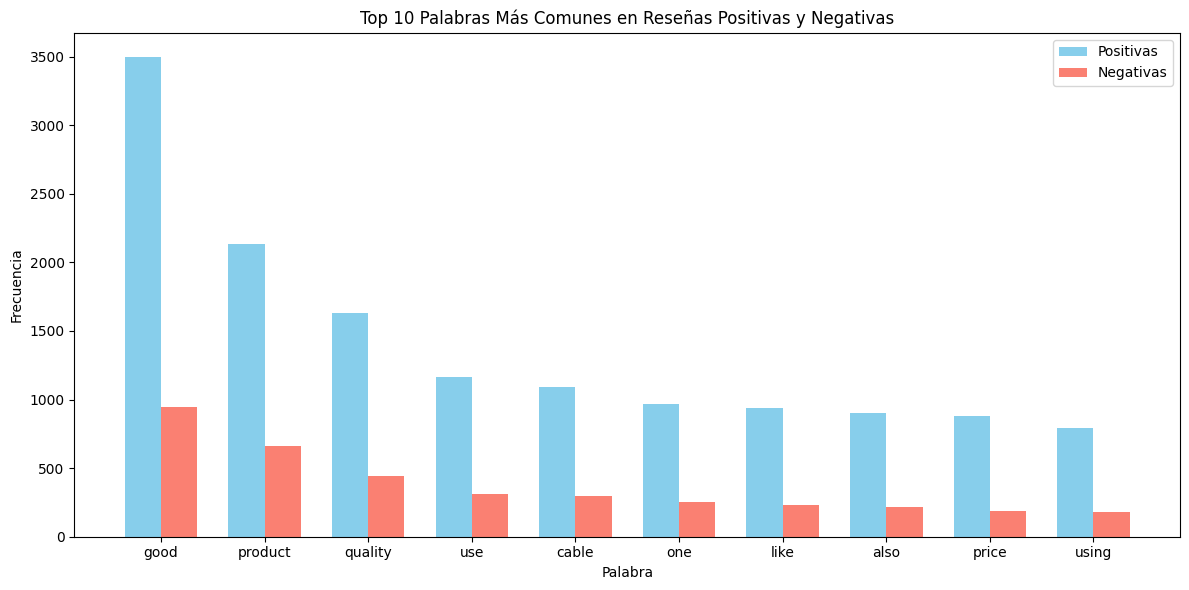

In [29]:
positive_reviews = df[df['positive'] == 1]['text']
negative_reviews = df[df['positive'] == 0]['text']

positive_text = ' '.join(positive_reviews.astype(str).tolist())
negative_text = ' '.join(negative_reviews.astype(str).tolist())

wordcloud_positive = WordCloud(stopwords=stop_words, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Reseñas Positivas')
plt.show()

wordcloud_negative = WordCloud(stopwords=stop_words, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Reseñas Negativas')
plt.show()

positive_word_counts = contar_palabras(positive_text)
negative_word_counts = contar_palabras(negative_text)

top_10_positive = positive_word_counts.most_common(10)
top_10_negative = negative_word_counts.most_common(10)

positive_words = [word for word, count in top_10_positive]
positive_counts = [count for word, count in top_10_positive]

negative_words = [word for word, count in top_10_negative]
negative_counts = [count for word, count in top_10_negative]

plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(top_10_positive))

plt.bar(index, positive_counts, bar_width, label='Positivas', color='skyblue')
plt.bar(index + bar_width, negative_counts, bar_width, label='Negativas', color='salmon')

plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Top 10 Palabras Más Comunes en Reseñas Positivas y Negativas')
plt.xticks(index + bar_width / 2, positive_words)
plt.legend()
plt.tight_layout()
plt.show()

### 4. Análisis Exploratorio de Datos (EDA)

Estadísticas descriptivas:
       discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1465.000000   
mean        7824.046416    5827.899659            47.691468     4.093788   
std        41336.057912   15755.694899            21.635905     0.310598   
min           14.000000      39.000000             0.000000     0.000000   
25%         1699.000000     825.000000            32.000000     4.000000   
50%         2990.000000    1690.000000            50.000000     4.100000   
75%         5990.000000    4400.000000            63.000000     4.300000   
max       998060.000000  433296.000000            94.000000     5.000000   

          positive  discount_percentage_high_rating  review_length  \
count  1465.000000                       929.000000    1465.000000   
mean      0.757679                        45.458558    1394.137884   
std       0.428634                        21.684370    1823.491796   
min     

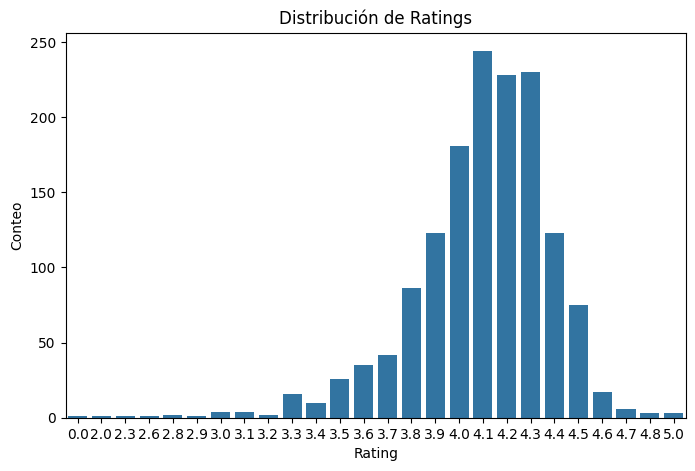

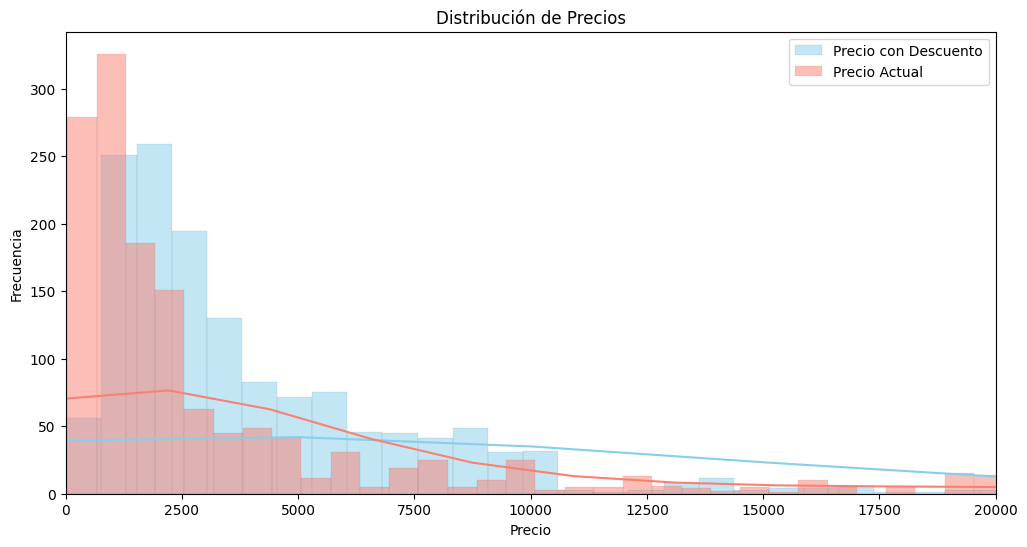

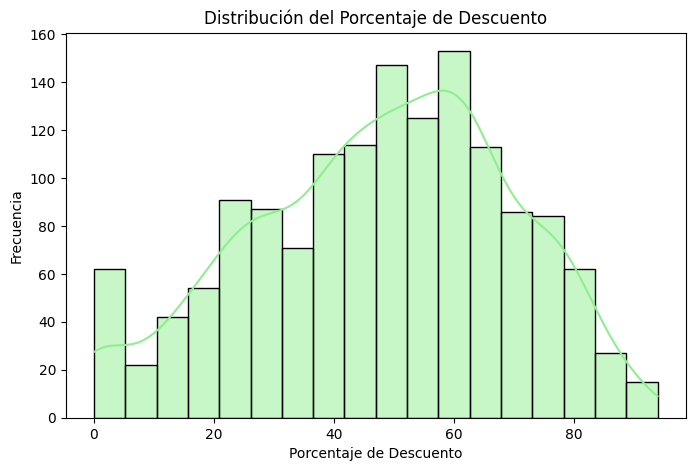

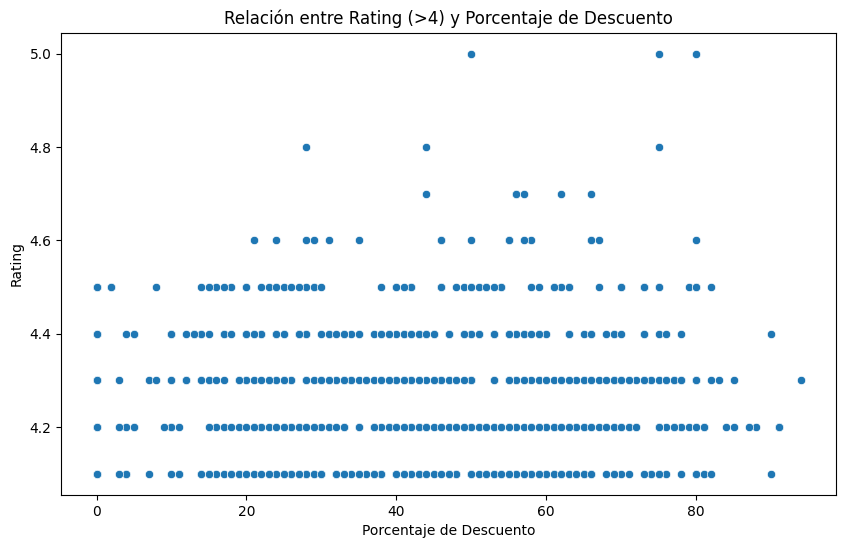

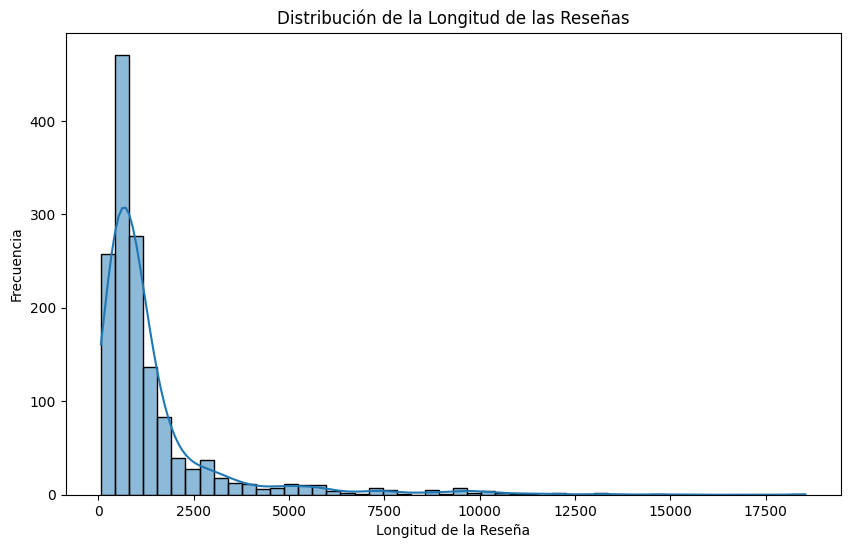

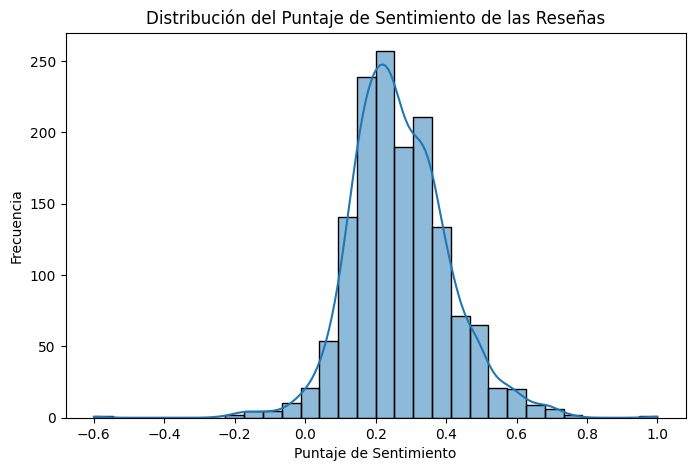

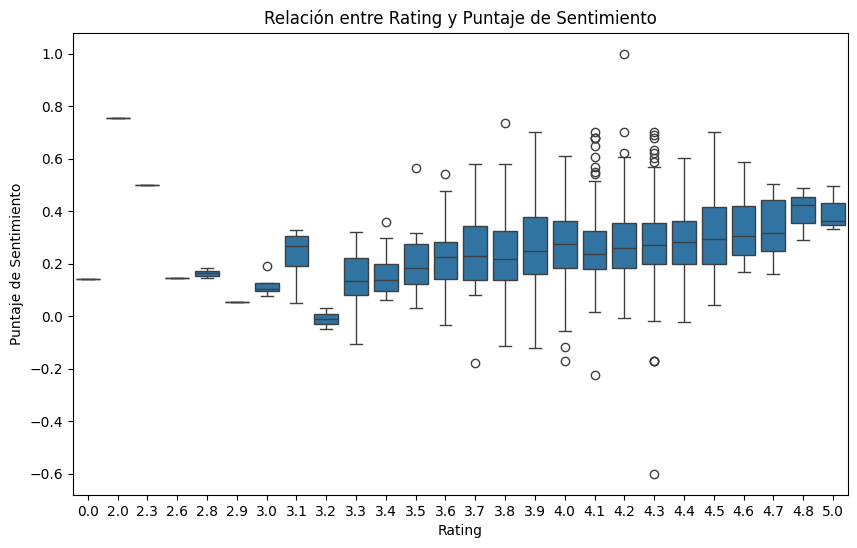

In [37]:
print("Estadísticas descriptivas:")
print(df.describe())

print("\nInformación del DataFrame:")
print(df.info())

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nDistribución de la variable 'positive':")
print(df['positive'].value_counts())
print(df['positive'].value_counts(normalize=True))

plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Conteo')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['discounted_price'], kde=True, color='skyblue', label='Precio con Descuento')
sns.histplot(df['actual_price'], kde=True, color='salmon', label='Precio Actual')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.xlim(0, 20000)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['discount_percentage'], kde=True, color='lightgreen')
plt.title('Distribución del Porcentaje de Descuento')
plt.xlabel('Porcentaje de Descuento')
plt.ylabel('Frecuencia')
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='discount_percentage', y='rating', data=df[df['rating'] > 4])
plt.title('Relación entre Rating (>4) y Porcentaje de Descuento')
plt.xlabel('Porcentaje de Descuento')
plt.ylabel('Rating')
plt.show()

df['review_length'] = df['text'].astype(str).apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], kde=True, bins=50)
plt.title('Distribución de la Longitud de las Reseñas')
plt.xlabel('Longitud de la Reseña')
plt.ylabel('Frecuencia')
plt.show()

df['sentiment_score'] = df['text'].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment_score'], kde=True, bins=30)
plt.title('Distribución del Puntaje de Sentimiento de las Reseñas')
plt.xlabel('Puntaje de Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='sentiment_score', data=df)
plt.title('Relación entre Rating y Puntaje de Sentimiento')
plt.xlabel('Rating')
plt.ylabel('Puntaje de Sentimiento')
plt.show()

### 5. Clasificación Supervisada – Regresión Logística (25 pts)


*   Haga una regresion logistica de postive vs text
*   Muestre los resultados en una matriz de confusion



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        89
           1       0.77      1.00      0.87       278

    accuracy                           0.77       367
   macro avg       0.89      0.53      0.50       367
weighted avg       0.83      0.77      0.69       367


Matriz de Confusión:


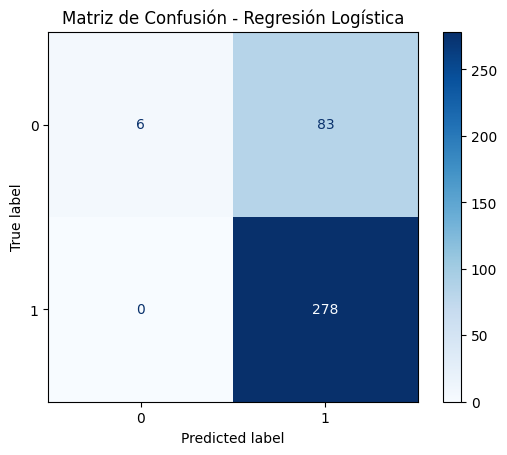

In [43]:
X = df['text'].astype(str)
y = df['positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # Usar stratify para manejar el desbalance de clases

model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

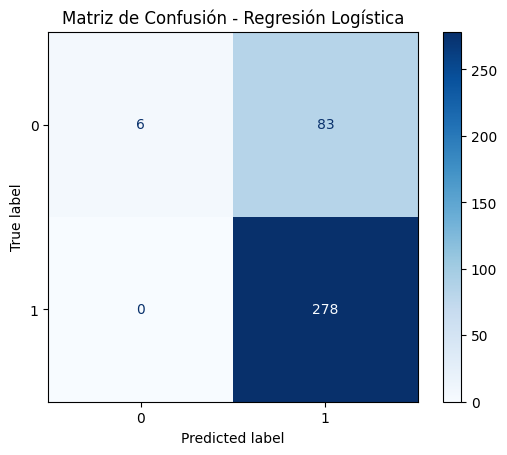

In [45]:
cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

### 6. Agrupamiento K-Means – No Supervisado (20 pts)


*   Cree una variable cluster usando un modelo de clustering

*   Como podria nombrar los clusters usando las otras variables



In [49]:

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(df['text'].astype(str))

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_tfidf)


print("\nCaracterísticas de los clusters:")
print(df.groupby('cluster')[['rating', 'discounted_price', 'actual_price', 'discount_percentage', 'sentiment_score', 'review_length']].mean())

cluster_0_indices = df[df['cluster'] == 0].index
cluster_0_text = X_tfidf[cluster_0_indices]

sum_tfidf = cluster_0_text.sum(axis=0)

feature_names = vectorizer.get_feature_names_out()

words_tfidf = [(word, sum_tfidf[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

sorted_words = sorted(words_tfidf, key=lambda x: x[1], reverse=True)

print(f"\nPalabras más comunes en el Cluster 0:")
print(sorted_words[:20])



Características de los clusters:
           rating  discounted_price  actual_price  discount_percentage  \
cluster                                                                  
0        3.666667         81.666667     96.666667            14.306667   
1        3.000000         60.000000     70.000000            14.280000   
2        5.000000        100.000000    120.000000            16.670000   

         sentiment_score  review_length  
cluster                                  
0               0.266667           25.0  
1              -0.200000           24.0  
2               0.800000           30.0  

Palabras más comunes en el Cluster 0:
[('is', np.float64(0.5928509111224307)), ('the', np.float64(0.554314843413088)), ('screen', np.float64(0.38775666010579296)), ('quality', np.float64(0.38775666010579296)), ('amazing', np.float64(0.38775666010579296)), ('screen quality', np.float64(0.38775666010579296)), ('quality is', np.float64(0.38775666010579296)), ('is amazing', np.float64(

In [51]:
print("\nCaracterísticas promedio por cluster:")
cluster_summary = df.groupby('cluster')[['rating', 'discounted_price', 'actual_price', 'discount_percentage', 'sentiment_score', 'review_length']].mean()
print(cluster_summary)

print("\nDistribución de 'positive' por cluster:")
cluster_positive_distribution = df.groupby('cluster')['positive'].value_counts(normalize=True).unstack().fillna(0)
print(cluster_positive_distribution)

print("\nPalabras más representativas por cluster:")

for i in range(kmeans.n_clusters):
    print(f"\n--- Cluster {i} ---")

    cluster_indices = df[df['cluster'] == i].index

    cluster_tfidf = X_tfidf[cluster_indices]

    sum_tfidf = cluster_tfidf.sum(axis=0)

    words_tfidf = [(word, sum_tfidf[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

    sorted_words = sorted(words_tfidf, key=lambda x: x[1], reverse=True)

    top_n_words = 20
    print(f"Palabras más comunes en el Cluster {i}:")
    for word, score in sorted_words[:top_n_words]:
        print(f"- {word}: {score:.4f}")

cluster_names = {
    0: 'Nombre del Cluster 0 (basado en análisis)',
    1: 'Nombre del Cluster 1 (basado en análisis)',

}

df['cluster_name'] = df['cluster'].map(cluster_names)

print("\nDataFrame con nombres de cluster:")
print(df[['text', 'rating', 'sentiment_score', 'cluster', 'cluster_name']].head())




Características promedio por cluster:
           rating  discounted_price  actual_price  discount_percentage  \
cluster                                                                  
0        3.666667         81.666667     96.666667            14.306667   
1        3.000000         60.000000     70.000000            14.280000   
2        5.000000        100.000000    120.000000            16.670000   

         sentiment_score  review_length  
cluster                                  
0               0.266667           25.0  
1              -0.200000           24.0  
2               0.800000           30.0  

Distribución de 'positive' por cluster:
positive     False     True 
cluster                     
0         0.333333  0.666667
1         1.000000  0.000000
2         0.000000  1.000000

Palabras más representativas por cluster:

--- Cluster 0 ---
Palabras más comunes en el Cluster 0:
- is: 0.5929
- the: 0.5543
- screen: 0.3878
- quality: 0.3878
- amazing: 0.3878
- screen quali

### 7. Insight & Recomendaciones (15 pts)
Escribe tu análisis aquí:

TODO: Relaciona errores del modelo con los clusters y propone acciones de negocio.

**Análisis Teórico:**

1.  **Variable Objetivo (y):** Es la variable dependiente que buscamos predecir o explicar. Ejemplo en este dataset: `positive`, que indica si una reseña es positiva (rating >= 4).
2.  **Fases del Pipeline de ML:** Insight de negocio → EDA → Pre-procesamiento → Modelado → Evaluación.
3.  **Clases Desbalanceadas:** Priorizaría el F1-Score, ya que equilibra precisión y recall, métricas cruciales para la clase minoritaria. Otras opciones: AUC-ROC o matriz de confusión.
4.  **Overfitting:** El modelo aprende demasiado del entrenamiento y pierde generalización. Se detecta por gran diferencia en métricas entre entrenamiento y validación. Se evita con validación cruzada o regularización.
5.  **K-means es un algoritmo de** *clustering no supervisado* **porque** *agrupa datos sin etiquetas previas, basándose en similitud*.
6.  (Pregunta 6 no presente en el texto)
7.  **Variable Objetivo en Regresión:** Cuantitativa y continua (e.g., precio, temperatura).
8.  **Técnicas de Pre-procesamiento de Texto:** Tokenización y Vectorización (TF-IDF, Bag-of-Words).
9.  **Parámetro k en K-means:** Representa el número de clusters. Si es muy grande, lleva a sobreajuste, clusters pequeños y menos interpretables, y mayor costo computacional.
10. **Embedding en NLP:** Representación vectorial densa del significado de palabras/frases. Utilidad: captura relaciones semánticas, es entrada para modelos avanzados, reduce dimensionalidad.

**Análisis Práctico:**

**Word Clouds y Gráfico de Barras:**

*   Se generaron Word Clouds que visualizan las palabras más frecuentes en reseñas positivas y negativas tras la limpieza.
*   El gráfico de barras compara las 10 palabras más comunes en ambos grupos. Esto permite identificar rápidamente términos asociados con experiencias positivas (`product`, `good`, `great`, `like`) y negativas (aunque las comunes pueden ser genéricas si no se filtra más allá de stopwords).

**Análisis Exploratorio de Datos (EDA):**

*   Las estadísticas y el `df.info()` muestran la estructura del dataset, tipos de datos y valores nulos.
*   La variable `positive` está significativamente desbalanceada, con muchas más reseñas positivas. Esto es clave para la evaluación del modelo de clasificación.
*   Los histogramas de precios (`discounted_price`, `actual_price`) y `discount_percentage` revelan la distribución de precios y descuentos. Se observa una alta concentración de productos en rangos de precios bajos y una amplia variedad de porcentajes de descuento.
*   El gráfico de dispersión entre `discount_percentage` y `rating` para reseñas con rating > 4 sugiere que no hay una correlación lineal fuerte entre altos ratings y el porcentaje de descuento, aunque hay puntos dispersos en rangos de descuento amplios.
*   La distribución de la longitud de las reseñas muestra que la mayoría son cortas.
*   El histograma del puntaje de sentimiento (`sentiment_score`) muestra una distribución sesgada hacia sentimientos positivos, lo cual es coherente con el desbalance en los ratings.
*   El boxplot de `sentiment_score` por `rating` confirma la relación esperada: ratings más altos tienden a tener puntajes de sentimiento más positivos.

**Clasificación Supervisada (Regresión Logística):**

*   Se entrenó un modelo de Regresión Logística utilizando TF-IDF para clasificar reseñas como positivas o negativas.
*   El `classification_report` y la `ConfusionMatrixDisplay` son cruciales para evaluar el rendimiento, especialmente dado el desbalance de clases. Es probable que la métrica Accuracy sea alta debido a la gran cantidad de positivos, pero es fundamental observar Precision, Recall y F1-Score para la clase minoritaria (negativos).
*   La matriz de confusión mostrará cuántos verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos predijo el modelo.

**Agrupamiento K-Means (No Supervisado):**

*   Se aplicó K-Means sobre la representación TF-IDF de las reseñas para crear grupos (`cluster`).
*   Para nombrar o interpretar estos clusters (`Como podria nombrar los clusters usando las otras variables`), se realizó un análisis de las características promedio por cluster (rating, precios, sentimiento, etc.) y de las palabras más frecuentes en cada cluster.
*   Al examinar `cluster_summary` y las "Palabras más representativas por cluster", se pueden asignar nombres descriptivos a cada grupo. Por ejemplo:
    *   Un cluster con alto rating promedio, alto puntaje de sentimiento y palabras como "love", "great", "best" podría llamarse "Clientes Muy Satisfechos".
    *   Un cluster con rating promedio bajo, puntaje de sentimiento negativo y palabras como "not working", "problem", "return" podría ser "Problemas Técnicos/Defectos".
    *   Otros clusters podrían representar grupos relacionados con el precio/descuento, longitud de la reseña, etc.
*   La distribución de la variable `positive` dentro de cada cluster (`cluster_positive_distribution`) también ayuda a caracterizar los grupos (e.g., un cluster con ~100% de reseñas positivas).

**Insight & Recomendaciones:**

*   **Errores del Modelo de Clasificación:** Analizar la matriz de confusión. ¿Dónde falla más el modelo? (e.g., ¿predice negativos como positivos, o positivos como negativos?). Relacionar estos errores con las características de los clusters. Por ejemplo, si el modelo falla prediciendo negativos que están en un cluster particular (identificado por K-Means), se podría investigar más a fondo por qué esas reseñas son difíciles de clasificar. Podrían ser reseñas ambiguas, cortas, o sobre productos específicos.
*   **Relación Errores y Clusters:** Si el modelo tiene dificultades con reseñas de un cluster específico (por ejemplo, el cluster "Problemas Técnicos/Defectos" identificado por K-Means), esto sugiere que las características que definen ese cluster (ciertas palabras clave, temas, etc.) no están siendo bien capturadas por el modelo TF-IDF o la regresión logística.
*   **Propuestas de Acciones de Negocio (basado en EDA y Clustering):**
    *   **Targeting de Descuentos:** Analizar si hay una relación (aunque no lineal) entre el descuento y los ratings altos en ciertos clusters. Si un cluster de "Clientes Satisfechos que Compraron con Descuento" es significativo, se podría considerar ofrecer descuentos similares para atraer a más clientes de alta satisfacción.
    *   **Mejora de Productos/Servicio:** Investigar los clusters con ratings y sentimientos bajos. ¿Qué temas recurrentes aparecen en las palabras clave de esos clusters? (e.g., `battery life`, `screen cracked`, `customer support`). Esto indica áreas claras para mejorar productos o procesos de atención al cliente.
    *   **Segmentación de Clientes para Marketing:** Usar la agrupación de K-Means para segmentar clientes. Se pueden enviar comunicaciones dirigidas basadas en el cluster al que pertenece una reseña del cliente (e.g., ofrecer accesorios complementarios a clientes en un cluster de "Entusiastas del Producto", o soporte técnico proactivo a clientes en un cluster de "Problemas Técnicos").
    *   **Análisis de Reseñas Negativas Específicas:** Focus en las reseñas identificadas como Falsos Positivos o Falsos Negativos por el modelo de clasificación, o aquellas en clusters de sentimiento negativo. Leer manualmente algunas de estas reseñas para entender por qué el modelo falló o qué las hace particularmente problemáticas.
    *   **Estrategias de Precio:** Comparar los precios (`discounted_price`, `actual_price`) en diferentes clusters. ¿Los clusters con ratings más altos tienden a tener precios más altos o bajos? ¿Hay una percepción de valor vinculada al precio dentro de ciertos segmentos de clientes?

En resumen, la combinación del modelo de clasificación para identificar reseñas positivas/negativas y el agrupamiento no supervisado para entender la estructura latente en los datos permite ir más allá de una simple métrica y obtener insights accionables sobre por qué los clientes tienen ciertas experiencias y dónde enfocar los esfuerzos de mejora.
```